In [2]:
import math
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
print('done')

done


In [3]:
#load mpg data set from seaborn library 
#estimates british fuel consumption 
df = sns.load_dataset("mpg")

In [4]:
#mpg is our target variable- miles per gallon = our dependent variable
#all others are independent and will help estimate mpg
#exploratory data analysis
print(df.info)

<bound method DataFrame.info of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu

In [5]:
df.drop(["name"], axis = 1, inplace = True)
print(df.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin  
0          70    usa  
1          70    usa  
2          70    usa  
3          70    usa  
4          70    usa  


In [6]:
print(df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


In [7]:
#data pre processing
print(df.isnull().sum())


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [8]:
print(df[df.isnull().any(axis=1)])


      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN    2046          19.0   
126  21.0          6         200.0         NaN    2875          17.0   
330  40.9          4          85.0         NaN    1835          17.3   
336  23.6          4         140.0         NaN    2905          14.3   
354  34.5          4         100.0         NaN    2320          15.8   
374  23.0          4         151.0         NaN    3035          20.5   

     model_year  origin  
32           71     usa  
126          74     usa  
330          80  europe  
336          80     usa  
354          81  europe  
374          82     usa  


In [9]:

df.dropna(inplace = True)
print(df.isnull().sum().any())
print(df.shape)

False
(392, 8)


In [10]:

print(df.cylinders.unique())
print(df.cylinders.value_counts())

[8 4 6 3 5]
cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64


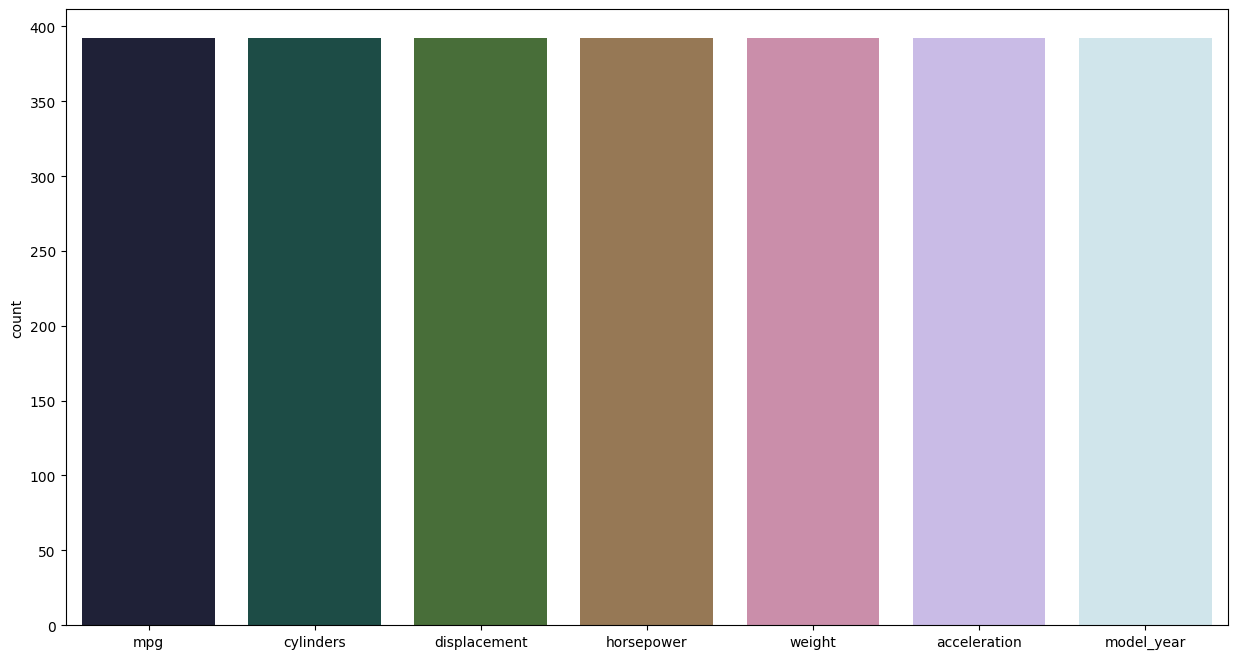

In [11]:
#plot 1
plt.figure(figsize = (15, 8))
sns.countplot(data = df, palette = "cubehelix")
plt.show()

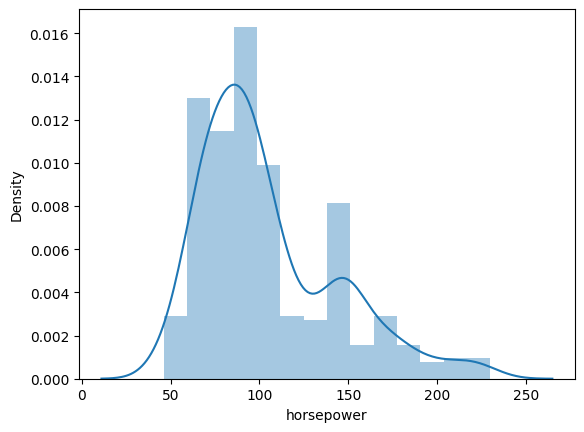

In [12]:
#plot 2- graph fits our analysis 
sns.distplot(df['horsepower'])
plt.show()

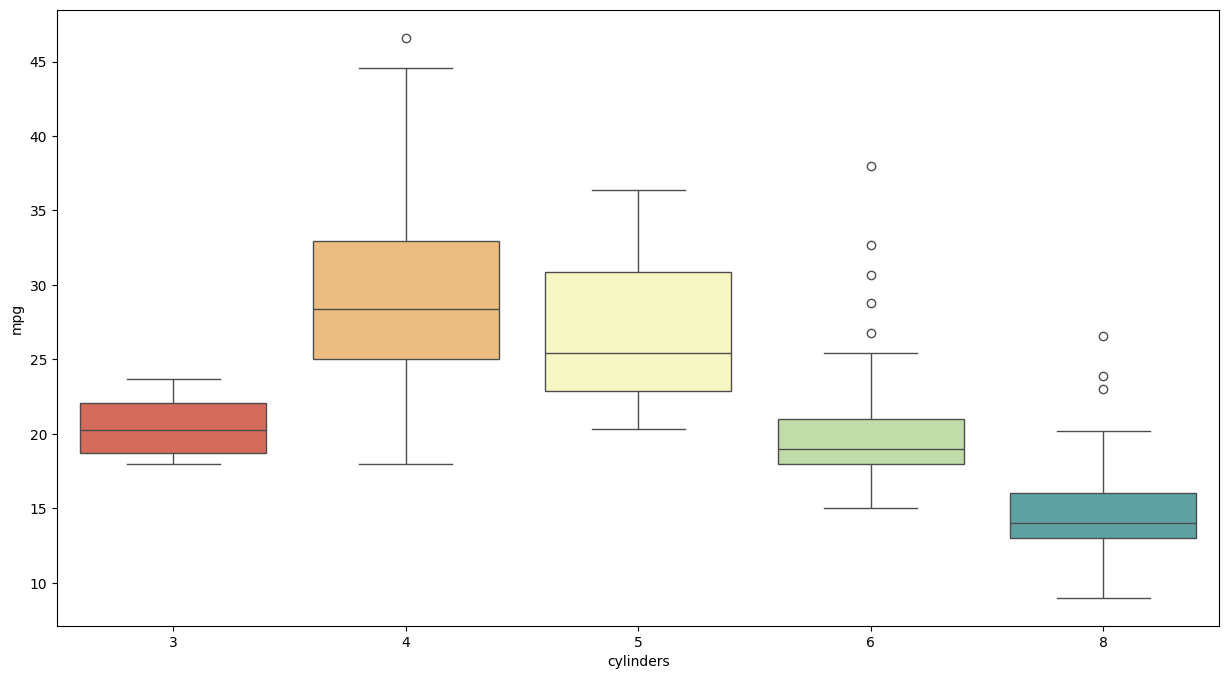

In [13]:
#bivariate analysis
plt.figure(figsize= (15,8))
sns.boxplot(x = 'cylinders', y = 'mpg', data = df, palette = 'Spectral')
plt.show()

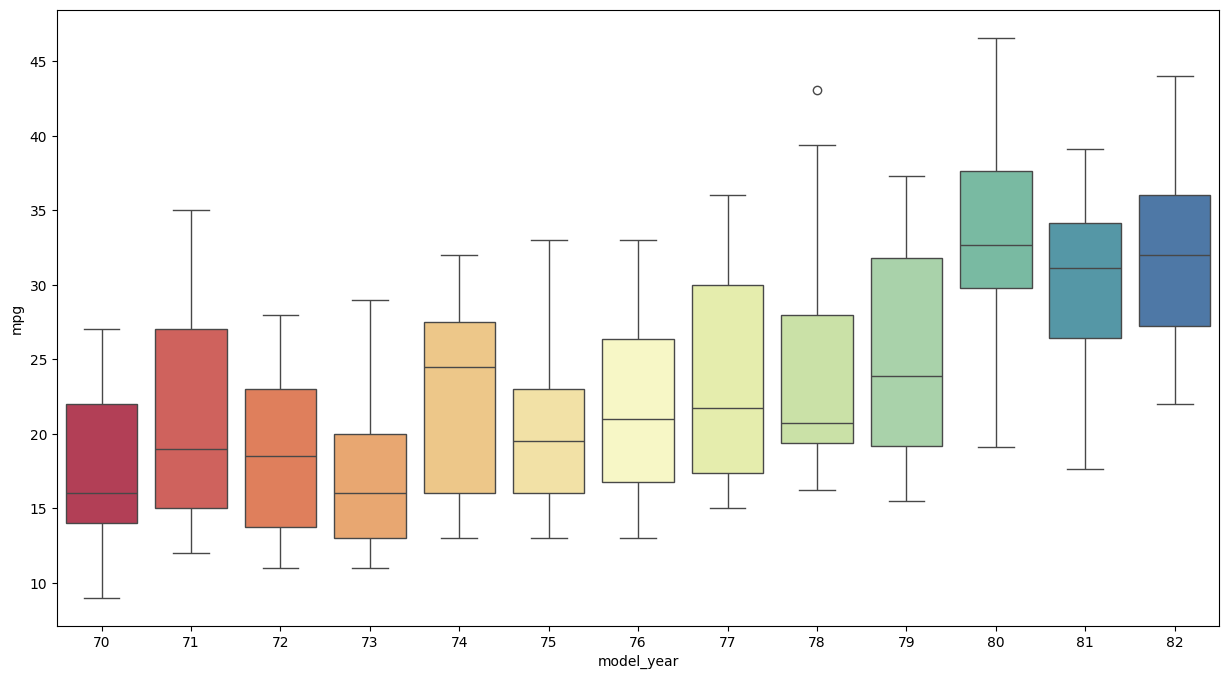

In [14]:

#does model year effect mgp value?
plt.figure(figsize= (15,8))
sns.boxplot(x = 'model_year', y = 'mpg', data = df, palette = 'Spectral')
plt.show()

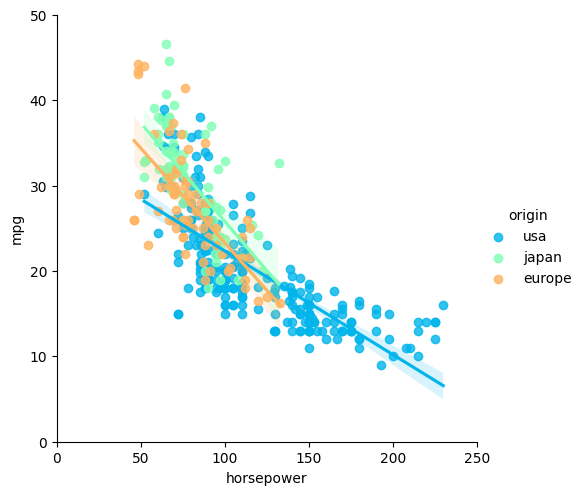

In [15]:
#multivariate analysis 
graph = sns.lmplot(x = 'horsepower', y='mpg', hue = 'origin', data=df, palette = 'rainbow')
graph.set(xlim = (0, 250))
graph.set(ylim = (0,50))
plt.show()

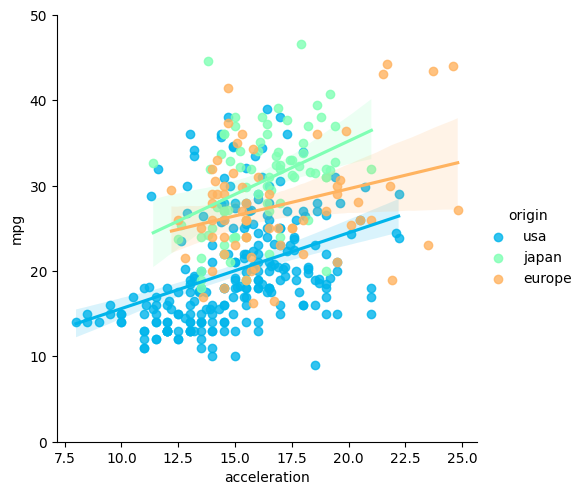

In [16]:
graph = sns.lmplot(x = 'acceleration', y='mpg', hue = 'origin', data=df, palette = 'rainbow')
graph.set(ylim = (0,50))
plt.show()

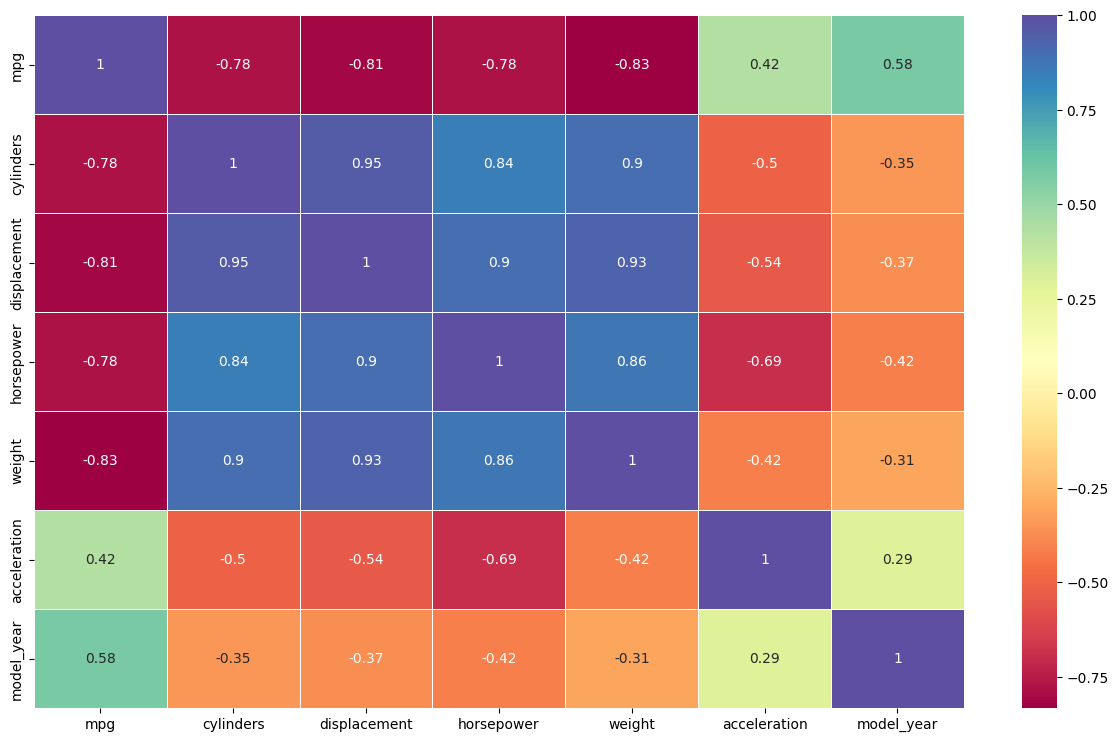

In [17]:
# heat map of correlation matrix **
df.drop(["origin"], axis = 1, inplace = True)
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, cmap = "Spectral")
plt.show()

In [18]:
#feature engineering- create new variable called age= model year - todays date
from datetime import datetime 
today = datetime.today()
this_year = today.year
this_year
df["age"] = this_year - df.model_year

In [19]:
#remove acc and displacement - make vairables in data suitabe for modeling 
df = sns.load_dataset("mpg")
df.drop(["name"], axis = 1, inplace = True)
print(df[df.isnull().any(axis=1)])
df.drop(["acceleration", "displacement"], axis = 1, inplace = True)
df.origin.unique()

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN    2046          19.0   
126  21.0          6         200.0         NaN    2875          17.0   
330  40.9          4          85.0         NaN    1835          17.3   
336  23.6          4         140.0         NaN    2905          14.3   
354  34.5          4         100.0         NaN    2320          15.8   
374  23.0          4         151.0         NaN    3035          20.5   

     model_year  origin  
32           71     usa  
126          74     usa  
330          80  europe  
336          80     usa  
354          81  europe  
374          82     usa  


array(['usa', 'japan', 'europe'], dtype=object)

In [20]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,mpg,cylinders,horsepower,weight,model_year,origin_japan,origin_usa
0,18.0,8,130.0,3504,70,False,True
1,15.0,8,165.0,3693,70,False,True
2,18.0,8,150.0,3436,70,False,True
3,16.0,8,150.0,3433,70,False,True
4,17.0,8,140.0,3449,70,False,True


In [21]:
#modeling 
#define independent variable
df = df.reset_index()
X = df.drop(['mpg'], axis = 1)

y = df["mpg"]

In [22]:
from sklearn.model_selection import train_test_split


In [23]:
#our data is ready for modeling now

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#change nans to 0 
X_train[np.isnan(X_train)] = 0


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
#create our model
lm_model = LinearRegression()

In [26]:
# X_train[X_train.isnull().any(axis=1)]
# X_train.dropna(inplace = True)
# X_train


In [27]:
# y_train[y_train.isnull().any()]
# y_train.dropna(inplace = True)
# y_train

In [28]:
#train our data and apply fit function
lm_model.fit(X_train, y_train)

LinearRegression()

In [29]:
#gives the y value while all variables are 0
lm_model.intercept_

-132.8128817892295

In [30]:
#create variable
coef_param = pd.DataFrame(lm_model.coef_, index = X.columns, columns = ['Coefficient'])
coef_param
#shows increase of 1 unit in first column causes mpg to change by X 
#origin_usa affects formula the most 

,Coefficient
index,-0.052857
cylinders,0.327520
horsepower,-0.006865
weight,-0.006216
model_year,2.447809
origin_japan,-0.381835
origin_usa,-2.877797


In [31]:
#TEST MODEL USING TEST DATA
X_test[np.isnan(X_test)] = 0
y_pred = lm_model.predict(X_test)

In [32]:
my_dict = {"Actual" : y_test, "Pred": y_pred}
compare = pd.DataFrame(my_dict)

compare.sample(10)


,Actual,Pred
33,19.0,21.266105
70,13.0,10.681845
262,19.2,21.726010
272,23.8,23.842148
396,28.0,28.549870
5,15.0,9.670501
298,23.0,19.455813
222,17.0,17.685812
383,38.0,35.917680
55,27.0,27.573103


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
#actual data first value, forecast value second 
def evaluation_metrics(actual, pred):
    MAE = mean_absolute_error(actual, pred)
    MSE = mean_squared_error(actual, pred)
    RMSE = np.sqrt(mean_squared_error(actual,pred))
    SCORE = r2_score(actual, pred)
    return print("r2_score", SCORE, "\n", "mae:", MAE, "\n", "mse:", MSE, "\n", "rmse:", RMSE)

In [35]:
evaluation_metrics(y_test, y_pred)

r2_score 0.8340020849466563 
 mae: 2.3463155117468886 
 mse: 8.925117562332886 
 rmse: 2.987493525069617


In [36]:
from yellowbrick.regressor import PredictionError

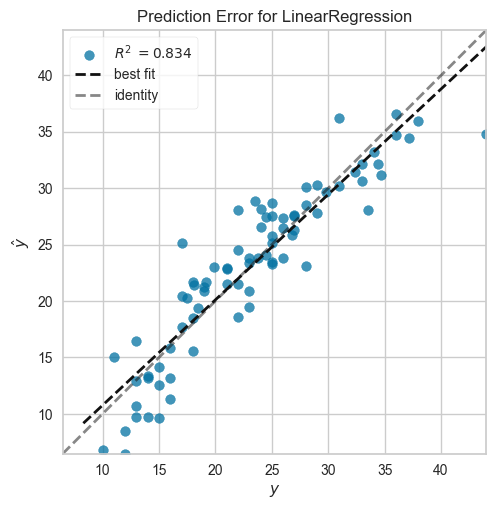

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [37]:
visualizer = PredictionError(lm_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

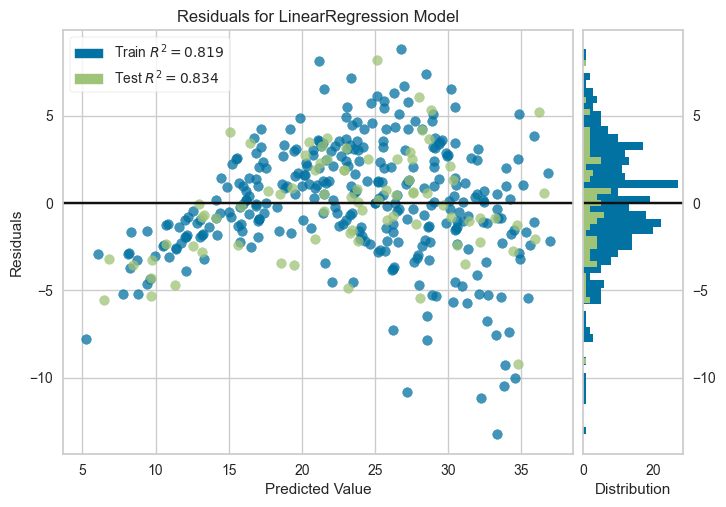

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [38]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

In [39]:
from sklearn.model_selection import cross_val_score


In [41]:
accuracies = cross_val_score(estimator = lm_model, X = X_train, y = y_train, cv = 10)

accuracies

array([0.86148668, 0.81505458, 0.75043774, 0.77176006, 0.85862544,
       0.80541997, 0.80468855, 0.77661928, 0.77074793, 0.80627439])

In [42]:
accuracies.mean()

0.8021114623930352

In [43]:
accuracies = cross_val_score(estimator = lm_model, X = X_train, y = y_train, cv = 10, scoring = 'neg_mean_squared_error')

In [45]:
-accuracies.mean()

11.98583350518172